In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import coreset, qaoa

np.random.seed()

In [2]:
data_vectors = np.load('Datasets/unbalance_data_vectors.npy')
#data_vectors = data_vectors - np.mean(data_vectors, axis=0)
np.random.shuffle(data_vectors)

In [3]:
B = coreset.get_bestB(data_vectors, num_runs=20, k=5)

cost_whole = coreset.kmeans_cost(data_vectors, coreset_vectors=data_vectors)
print('cost_whole is %s' % cost_whole)

# random sampling "coreset":
random_sample_5_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=5)] for _ in range(10)]
random_sample_10_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=10)] for _ in range(10)]
random_sample_20_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=20)] for _ in range(10)]
random_sample_40_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=40)] for _ in range(10)]
cost_5_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_5_list[i]) for i in range(10)]
cost_10_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_10_list[i]) for i in range(10)]
cost_20_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_20_list[i]) for i in range(10)]
cost_40_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_random_list is %s, %s, %s, %s' % (
    np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list)))

# actual coreset:
coreset_vectors_5_list, coreset_weights_5_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_5_list[i], coreset_weights_5_list[i] = coreset.BFL16(data_vectors, B=B, m=5)

coreset_vectors_10_list, coreset_weights_10_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_10_list[i], coreset_weights_10_list[i] = coreset.BFL16(data_vectors, B=B, m=10)
    
coreset_vectors_20_list, coreset_weights_20_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_20_list[i], coreset_weights_20_list[i] = coreset.BFL16(data_vectors, B=B, m=20)

coreset_vectors_40_list, coreset_weights_40_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_40_list[i], coreset_weights_40_list[i] = coreset.BFL16(data_vectors, B=B, m=40)

cost_5_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_5_list[i], sample_weight=coreset_weights_5_list[i]) for i in range(10)]
cost_10_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_10_list[i], sample_weight=coreset_weights_10_list[i]) for i in range(10)]
cost_20_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_20_list[i], sample_weight=coreset_weights_20_list[i]) for i in range(10)]
cost_40_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_40_list[i], sample_weight=coreset_weights_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_coreset_list is %s, %s, %s, %s' % (
    np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list)))

best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
best_coreset_vectors = coreset_vectors_5_list[best_index]
best_coreset_weights = coreset_weights_5_list[best_index]
print('\nzeroth order for m=5 coreset:')
qaoa_bound_zero_5 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

best_index = cost_10_coreset_list.index(np.min(cost_10_coreset_list))
best_coreset_vectors = coreset_vectors_10_list[best_index]
best_coreset_weights = coreset_weights_10_list[best_index]

print('\nzeroth order for m=10 coreset:')
qaoa_bound_zero_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

print('\nfirst order for m=10 coreset:')
qaoa_bound_first_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=1)

print('\nsecond order for m=10 coreset:')
qaoa_bound_second_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=2)

print('\ninfinite order for m=10 coreset:')
qaoa_bound_inf_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order='inf')

cost_whole is 7011360115400.65
min cost_{5, 10, 20, 40}_random_list is 8929438401903.0, 7466635405678.356, 7325570554581.9375, 7139634388422.006
min cost_{5, 10, 20, 40}_coreset_list is 7872154193456.996, 7319515671307.414, 7071314699796.02, 7054665914813.437

zeroth order for m=5 coreset:
7872154193457.002 (1, -1, -1, 1, 1) 0.053367762735760826 3.109519827070389e+17
9301395051793.58 (1, 1, 1, -1, -1) 24.46854718567113 2.7752566914974272e+17
11565153218742.701 (1, -1, -1, -1, -1) 0.011531279746903645 3.9524372481635464e+16

zeroth order for m=10 coreset:
42335262820762.77 (-1, -1, -1, 1, 1, -1, 1, -1, -1, -1) 0.21564342565309277 2.1678710375839416e+16
49806110527794.72 (1, -1, 1, 1, 1, 1, -1, 1, 1, 1) 5.95072783681311 1.0171617883586746e+16
9148899343639.898 (1, 1, 1, -1, 1, 1, -1, 1, 1, -1) 38.97157723676386 1.815856702992215e+17
10003280345065.426 (-1, -1, -1, -1, -1, -1, 1, -1, -1, 1) 0.020830644279889052 1.4771920413867386e+17
10175067926958.686 (1, 1, 1, 1, 1, 1, 1, 1, 1, -1) 85.0

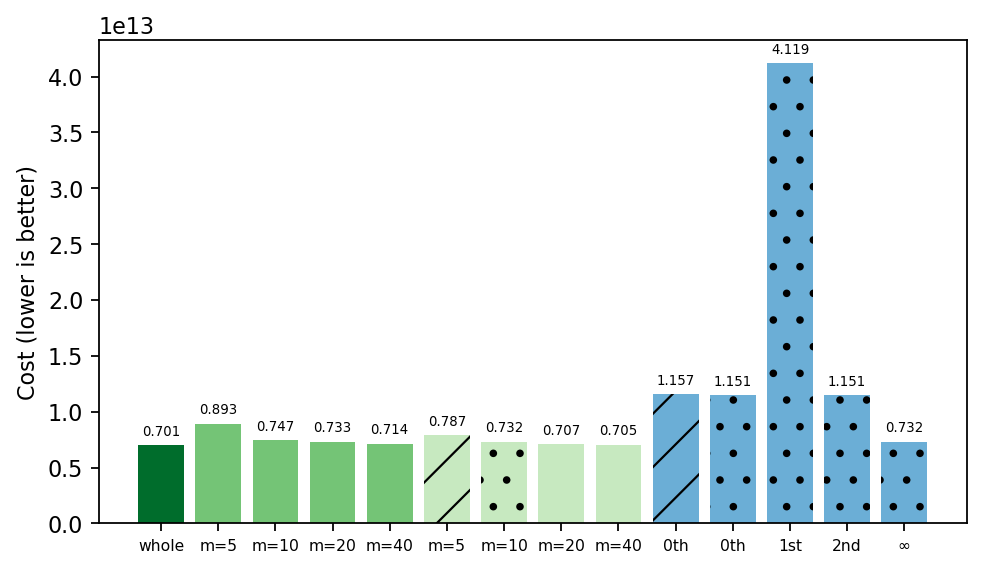

In [5]:
x = np.arange(14)
costs = [cost_whole, np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list),
         np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list),
         qaoa_bound_zero_5, qaoa_bound_zero_10, qaoa_bound_first_10, qaoa_bound_second_10, qaoa_bound_inf_10]
scale = np.floor(np.log10(max(costs)))

labels = ['whole', 'm=5', 'm=10', 'm=20', 'm=40', 'm=5', 'm=10', 'm=20', 'm=40', '0th', '0th', '1st', '2nd', u"\u221E"]
color = ['#006d2c', '#74c476', '#74c476', '#74c476', '#74c476', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']
hatch=['', '', '', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']
# plt.bar(x, costs, yerr=yerr, color=color, hatch=hatch)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() / (10 ** scale)
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=6)


fig, ax = plt.subplots(figsize=(7, 4), dpi=160)
for i in range(len(x)):
    rects = ax.bar(x[i], costs[i], label=labels[i], color=color[i], hatch=hatch[i]) # , yerr=[[yerr[0][i]], [yerr[1][i]]])
    autolabel(rects)
    
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=7)
ax.set_ylabel('Cost (lower is better)')
#ax.set_yscale('log')



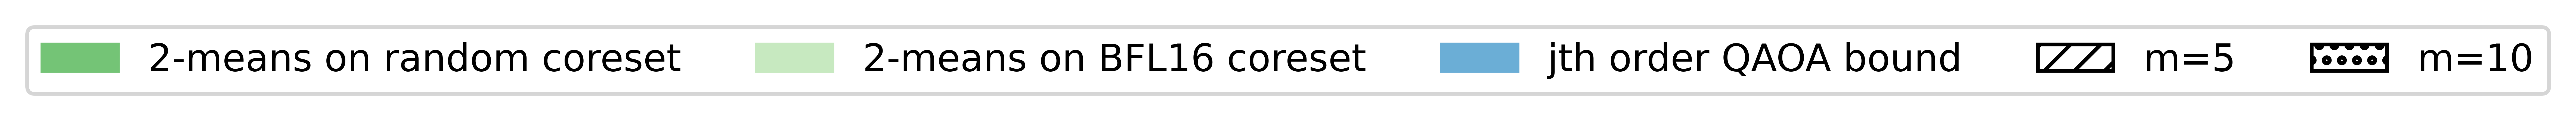

In [19]:
from matplotlib.patches import Rectangle
dummy_rects = [Rectangle((0, 0), 1, 1, color='#74c476'),
               Rectangle((0, 0), 1, 1, color='#c7e9c0'),
               Rectangle((0, 0), 1, 1, color='#6baed6'),
               Rectangle((0, 0), 1, 1, hatch='/'*3, edgecolor='k', facecolor='w'),
               Rectangle((0, 0), 1, 1, hatch='o'*3, edgecolor='k', facecolor='w')]
fig, ax = plt.subplots(figsize=(10, 0.5), dpi=1000)
ax.set_axis_off()
ax.legend(dummy_rects, ['2-means on random coreset', '2-means on BFL16 coreset', 'jth order QAOA bound',
                        'm=5', 'm=10'],
          ncol=5, loc=10)
plt.tight_layout()
plt.savefig('legend.pdf')